# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [2]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage import img_as_float
from skimage import filters
from matplotlib import cm
from scipy.signal import correlate2d

Pretty printing has been turned OFF


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [10]:
def conv_fn(x, h):
    x_pad = np.zeros((len(x) + 2*len(h),))
    x_pad[len(h)-1:len(h)+len(x)-1] = x.copy()
    y = np.zeros(len(x_pad))
    
   
    h = h[::-1]

    for i in range(0,len(x)+len(h)):
        h_pad = np.zeros(x_pad.shape)
        h_pad[i:len(h)+i] = h.copy()
        y[i] = np.sum(x_pad*h_pad)
        
    return y 
        

In [11]:
def dirac(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be in the range from 0 to N-1')
            
    s = np.zeros((N, ))
    s[n] = 1
    
    return s



In [12]:
def step(n=0, N=20):
    if n > N - 1:
        raise ValueError('n should be in the range from 0 to N-1')
    
    s = np.zeros((N, ))
    for n in range (n, N):
        s[n] = 1
    
    return s

[ 1.  2.  3.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  1.   3.   6.  10.  10.   9.   7.   4.   0.   0.   0.   0.   0.   0.]
[-1. -1. -1. -1.  4.  0.  0.  0.]
[   1.            4.71828183   15.82561976   47.01849461  127.80951949
  199.00913523  244.13659779  218.39260013    0.            0.            0.
    0.            0.            0.        ]


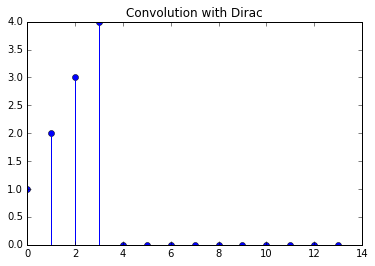

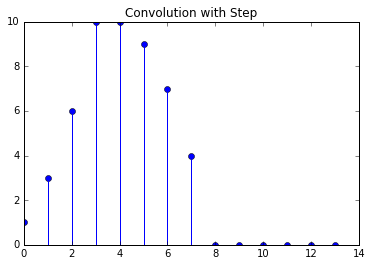

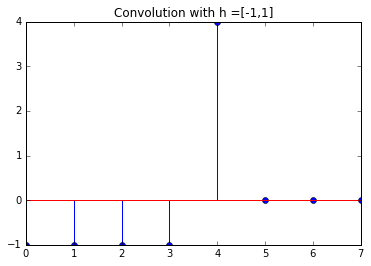

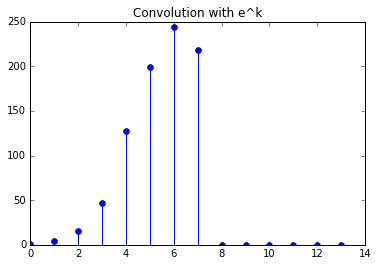

In [14]:
# For N=5
x = np.array([1, 2, 3, 4])

#Dirac
h1 = dirac(N=5)
y1 = conv_fn(x, h1)
print(y1)
plt.figure()
plt.stem(y1)
plt.title('Convolution with Dirac')


#Step
h2 = step(N=5)
y2 = conv_fn(x, h2)
print(y2)
plt.figure()
plt.stem(y2)
plt.title('Convolution with Step')


#h e -1,1
h3 = np.array([-1,1])
y3 = conv_fn(x, h3)
print(y3)
plt.figure()
plt.stem(y3)
plt.title('Convolution with h =[-1,1]')

#e^k
h4 = np.zeros(5)
for i in range(5):
    h4[i] = np.math.exp(i)
    
y4 = conv_fn(x, h4)
print(y4)
plt.figure()
plt.stem(y4)
plt.title('Convolution with e^k')

## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [33]:
def conv_fn2(h, I):
    r,c = I.shape
    n,m = h.shape
    I_pad = np.zeros([r+4, c+4])
    
    I_new = np.zeros(I.shape)
    
    for i in range(2, r+2):
        for j in range(2, c+2):
            I_pad[i][j] = I[i-2][j-2]
        
    for i in range(r):
        for j in range(c):
            part = I_pad[r:r+n, c:c+m]
            I[r][c] = np.sum(h*part)
    
    


    return I_new
    

ValueError: operands could not be broadcast together with shapes (5,5) (4,4) 

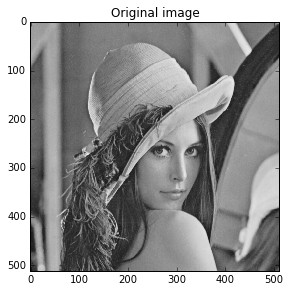

In [34]:
img = io.imread('./images/lena-grey.bmp')
img = img_as_float(img)
plt.figure()
io.imshow(img)
plt.title('Original image')

K = 1./256 * np.array([[1., 4., 6., 4., 1.],
      [4., 16., 24., 16., 4.],
      [6., 24., 36., 24., 6.],
      [4., 16., 24., 16., 4.],
      [1., 4., 6., 4., 1.]])

img_new = conv_fn2(K,img)
plt.figure()
io.imshow(img_new)
plt.title('Filtered image with Gaussian kernel')

S  = np.array([[1., 2., 0., -2., -1.],
               [4., 8., 0., -8., -4.],
               [6., 12., 0., -12., -6.], 
               [4., 8., 0., -8., -4.], 
               [1., 2., 0., -2., -1.]])

new_img2 = conv_2d(S,img)

io.imshow(new_img2)
plt.title('Sobel Filtering')

In [ ]:
S  = np.array([[1,2,0,-2,-1],[4,8,0,-8,-4],[6,12,0,-12,-6], [4,8,0,-8,-4], [1,2,0,-2,-1] ])

new_img2 = conv_2d(img,S)

io.imshow(new_img2)
plt.title('Sobel Filtering')


## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

/Users/darjastoeva/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


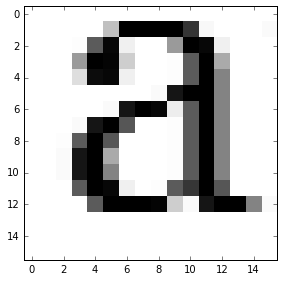

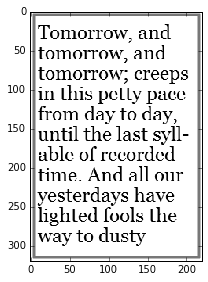

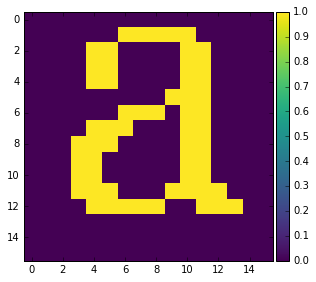

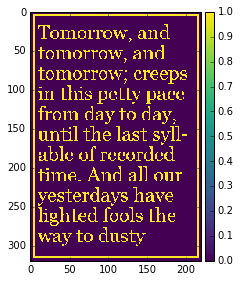

In [22]:
letter_im = io.imread('./images/a.png')
letter_im = rgb2gray(letter_im)
text_im = io.imread('./images/text.png')
text_im = rgb2gray(text_im)


plt.figure()
io.imshow(letter_im)

plt.figure()
io.imshow(text_im)


letter_treshold = filters.threshold_otsu(letter_im)
letter_bin = (letter_im < letter_treshold).astype(int)
#letter_bin = np.invert(letter_bin)
plt.figure()
io.imshow(letter_bin)

text_treshold = filters.threshold_otsu(text_im)
text_bin = (text_im < text_treshold).astype(int)
#text_bin = np.invert(text_bin)
plt.figure()
io.imshow(text_bin)


/Users/darjastoeva/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


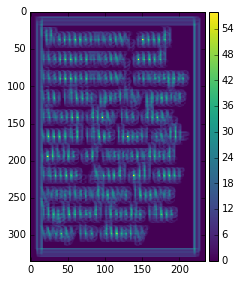

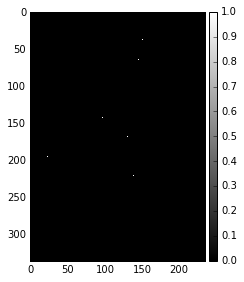

In [25]:
corr = correlate2d(text_bin, letter_bin)
io.imshow(corr)

max_corr = np.max(corr)

corr_a = corr > (0.85*max_corr)
plt.figure()
io.imshow(corr_a, cmap = plt.cm.gray)
